In [1]:
import pandas as pd


In [2]:
dataframe= pd.read_csv(r"C:\Users\user\Documents\Final CSE475 PRoject\train.csv")
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


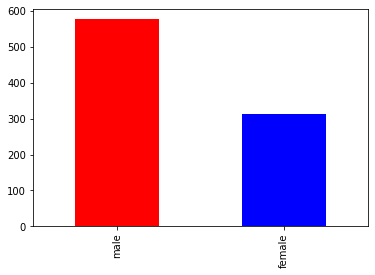

In [3]:
%matplotlib inline
alpha_color= 0.1
dataframe['Sex'].value_counts().plot(kind='bar',color=['r','b'])



In [4]:
dataframe['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

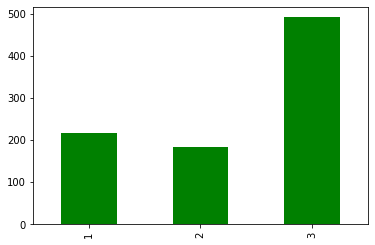

In [5]:
dataframe['Pclass'].value_counts().sort_index().plot(kind='bar',color=['g'])


In [6]:
dataframe['Survived'].value_counts()*100/len(dataframe)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

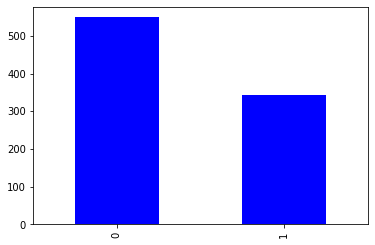

In [7]:
dataframe['Survived'].value_counts().plot(kind='bar',color=['b'])

In [8]:
dataframe.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns',inplace=True)

In [9]:
dataframe.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [10]:
x=dataframe.drop('Survived',axis='columns')
y=dataframe.Survived

In [11]:
x.Sex= x.Sex.map({'male':1, 'female':2})

In [12]:
x.Age.isnull().sum()


177

In [13]:
x.Age[:40]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26     NaN
27    19.0
28     NaN
29     NaN
30    40.0
31     NaN
32     NaN
33    66.0
34    28.0
35    42.0
36     NaN
37    21.0
38    18.0
39    14.0
Name: Age, dtype: float64

In [14]:
x.Age= x.Age.fillna(x.Age.mean())

In [15]:
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [18]:
len(x_train)

712

In [19]:
len(x_test)

179

In [20]:
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [21]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
s=model.score(x_test,y_test)
p=100
m=s*p

In [23]:
print("Accuracy: %0.3f" %m,'%')

Accuracy: 74.860 %


In [24]:
pclass=int(input("Enter the Pclass: "))
sex=int(input("Enter sex, for male 1 and for female 2: "))
age=float(input("Enter age: "))
fair=float(input("Enter fair: "))

p=model.predict([[pclass,sex,age,fair]])

print(p)
if p==0:
    print("This person is Died")
if p==1:
    print("This person is Survived")

Enter the Pclass: 1
Enter sex, for male 1 and for female 2: 1
Enter age: 54
Enter fair: 51.8625
[0]
This person is Died


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [26]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
s1=model.score(x_test,y_test)
p=100
n=s1*p

In [28]:
print("Accuracy: %0.3f" %n,'%')

Accuracy: 77.654 %


In [29]:
pclass=int(input("Enter the Pclass: "))
sex=int(input("Enter sex, for male 1 and for female 2: "))
age=float(input("Enter age: "))
fair=float(input("Enter fair: "))

p=model.predict([[pclass,sex,age,fair]])

print(p)
if p==0:
    print("This person is Died")
if p==1:
    print("This person is Survived")

Enter the Pclass: 2
Enter sex, for male 1 and for female 2: 2
Enter age: 14
Enter fair: 16
[1]
This person is Survived


In [30]:
from sklearn.svm import SVC
model= SVC()

In [31]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
s2=model.score(x_test,y_test)
p=100
o=s2*p

In [33]:
print("Accuracy: %0.3f" %o,'%')

Accuracy: 67.598 %


In [34]:
pclass=int(input("Enter the Pclass: "))
sex=int(input("Enter sex, for male 1 and for female 2: "))
age=float(input("Enter age: "))
fair=float(input("Enter fair: "))

p=model.predict([[pclass,sex,age,fair]])

print(p)
if p==0:
    print("This person is Died")
if p==1:
    print("This person is Survived")

Enter the Pclass: 1
Enter sex, for male 1 and for female 2: 1
Enter age: 40
Enter fair: 27.7208
[0]
This person is Died


In [35]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()

In [36]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
s3=model.score(x_test,y_test)
p=100
q=s2*p

In [38]:
print("Accuracy: %0.3f" %q,'%')

Accuracy: 67.598 %


In [39]:
pclass=int(input("Enter the Pclass: "))
sex=int(input("Enter sex, for male 1 and for female 2: "))
age=float(input("Enter age: "))
fair=float(input("Enter fair: "))

p=model.predict([[pclass,sex,age,fair]])

print(p)
if p==0:
    print("This person is Died")
if p==1:
    print("This person is Survived")
    

Enter the Pclass: 1
Enter sex, for male 1 and for female 2: 1
Enter age: 40
Enter fair: 27.7208
[0]
This person is Died
